In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import logging
import requests
import datetime as dt
import pylab

import scipy.stats as stats
from matplotlib import pyplot

import numpy as np

import warnings
warnings.filterwarnings('ignore')

logging.getLogger().setLevel(logging.INFO)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import os, sys

home = os.environ["HOME"]
sys.path.append(f"{home}/Desktop/project-ursa/lib")

import imp

In [2]:
import data_utils
import monte_carlo
import machine_npv
import implied_payback_time
import mining_constants
import delta_hedge
import machine_replication
import analysis

imp.reload(data_utils)
imp.reload(monte_carlo)
imp.reload(machine_npv)
imp.reload(mining_constants)
imp.reload(implied_payback_time)
imp.reload(delta_hedge)
imp.reload(machine_replication)
imp.reload(analysis)

<module 'analysis' from '/Users/merkle-employee/Desktop/project-ursa/lib/analysis.py'>

In [3]:
##########################################################################################
## 
##########################################################################################
du = data_utils.DataUtility("")
du._raw_network_price_df    = pd.read_csv("../../data/raw_network_price.csv").drop("Unnamed: 0", axis="columns")
du._raw_network_price_df.time = pd.to_datetime(du._raw_network_price_df.time)
du._df_feature() 
du._aggregate_weekly_df() 

machine_prices = data_utils.machine_market_prices("../../data/machine_prices.csv")
du._weekly_machine_price_df = du._join_machine_price(machine_prices, HR_ROLLING_AVG=30)

weekly_df = du._weekly_network_price_df
machine_df = du._weekly_machine_price_df

In [4]:
##########################################################################################
## 
##########################################################################################
imp.reload(monte_carlo)
machine_params   = mining_constants.machine_params()
machine_duration = 1.2
ky = mining_constants.MACHINE_M20
params = {
    "asic_energy_consumption" : machine_params[ky]["energy_consumption"],
    "asic_hash_rate"          : machine_params[ky]["hash_rate"],
    "electricity_cost"        : 0.03,
    "machine_duration"        : machine_duration,
    "sample_rate"             : mining_constants.SAMPLE_RATE_WEEKLY,
    "mc_size"                 : 1000,
    "interest_rate"           : 0.05,
    "asic_number"             : 1,
    "asic_efficiency"         : 1.0,
    "pool_fee"                : 0.005,
    "analysis_denomination"   : mining_constants.ASSET_USD
}

sp = monte_carlo.GBMPriceLinearHashRate()
sp.fit(weekly_df, sample_rate = mining_constants.SAMPLE_RATE_WEEKLY)
m_usd_bsm = machine_npv.MachineNPV_USD_BSM(sp, params)

In [5]:
#  machine_df.tail(1)
machine_params

{'S19J': {'energy_consumption': 3.5, 'hash_rate': 100},
 'S9': {'energy_consumption': 1.31, 'hash_rate': 13},
 'S17': {'energy_consumption': 2.288, 'hash_rate': 64},
 'M20': {'energy_consumption': 3.36, 'hash_rate': 68},
 'M30': {'energy_consumption': 3.268, 'hash_rate': 86}}

In [10]:
##########################################################################################
## 
##########################################################################################
imp.reload(implied_payback_time)
ipt    = implied_payback_time.ImpliedPayoffTime(params, m_usd_bsm, machine_df.tail(10))
ipt_df = ipt.compute(machine_type=mining_constants.MACHINE_M20, alpha=0.75, beta=0.5, MAX_DURATION=5)
start_time, hash_rate, btc_close, option_bundle_init, machine_cost, ipb_ttm  = ipt.extract_bundle(k=0)

INFO:root:simulate: T = 5 sample_rate = 52 => steps = 260 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799
INFO:root:simulate: T = 5 sample_rate = 52 => steps = 260 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  260
steps  260


INFO:root:simulate: T = 5 sample_rate = 52 => steps = 260 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799
INFO:root:simulate: T = 5 sample_rate = 52 => steps = 260 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799
INFO:root:simulate: T = 5 sample_rate = 52 => steps = 260 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  260
steps  260


INFO:root:simulate: T = 5 sample_rate = 52 => steps = 260 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799
INFO:root:simulate: T = 5 sample_rate = 52 => steps = 260 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  260
steps  260


INFO:root:simulate: T = 5 sample_rate = 52 => steps = 260 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799
INFO:root:simulate: T = 5 sample_rate = 52 => steps = 260 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  260
steps  260


INFO:root:simulate: T = 5 sample_rate = 52 => steps = 260 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  260
steps  260


In [13]:
# (start_time, hash_rate, btc_close, machine_cost, ipb_ttm)

INFO:root:simulate: T = 2 sample_rate = 8760 => steps = 17520 vol-scale(52/8760) vol 0.0873135992840332 => 0.006727156172111973 mu 0.005344673686849799 = > 3.172637348358328e-05


steps  17520


INFO:root:simulate: daily_reward x (365 / 52) = daily_reward x (7.019230769230769)


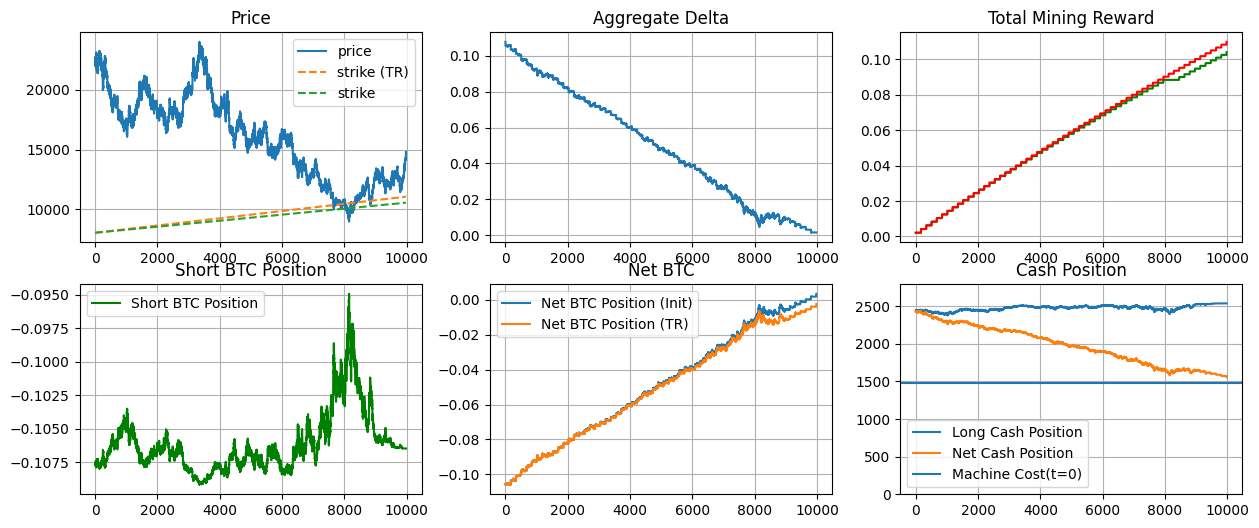

INFO:root:{'machine_cost': 1480.0, 'tracking_error_ideal': 0.08469237593659247, 'tracking_error_true': 0.026116415512644393, 'short_shortfall_init': 0.0033474013189541407, 'short_shortfall_true': -0.002504460482750978, 'weekly_liq_unhedged_init': 776.481729104832, 'weekly_liq_unhedged_true': 1721.4491587006205, 'unhedged_tracking_error_init': -0.4753501830372757, 'unhedged_tracking_error_true': 0.1631413234463652}


In [12]:
##########################################################################################
## 
##########################################################################################
imp.reload(machine_replication)
replication_params = {
    "interest_rate": 0.05, 
    "slippage" : 0.005
}



ttm_vec, ttm_dt_vec, St, HRt, wt, Ht = sp.simulate(
    start_time    = start_time,
    spot_init     = btc_close,
    hashrate_init = hash_rate,
    sample_rate   = mining_constants.SAMPLE_RATE_HOURLY,
    N = 100,
    T = 2
)

price_df = pd.DataFrame({"ttm" : ttm_vec, "time": ttm_dt_vec, "price": St[:, 0], "wt": wt}).set_index("time")
hedge_iv = sp._gbm_params.get("sigma") * np.sqrt(mining_constants.WEEK_IN_YEAR)

## Initialize dataframe for all tracked metrics 
mr = machine_replication.MachineReplication(option_bundle_init, price_df, replication_params)
r  = mr.process()

tmo = machine_replication.TrueMiningOutput(mr, sp, params, option_bundle_init)
tmo._generate_true_performance(start_time, hash_rate, 1.2)
result_df = tmo._generate_result_df()
metrics = tmo._generate_metrics(machine_cost)
# metrics
tmo.plot_simulation(machine_cost)